In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("all_sources_metadata_2020-03-13.csv")

# Show shape and first few rows
print(df.shape)
df.head()


(29500, 14)


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False


In [2]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sha                          17420 non-null  object 
 1   source_x                     29500 non-null  object 
 2   title                        29491 non-null  object 
 3   doi                          26357 non-null  object 
 4   pmcid                        27337 non-null  object 
 5   pubmed_id                    16730 non-null  float64
 6   license                      17692 non-null  object 
 7   abstract                     26909 non-null  object 
 8   publish_time                 18604 non-null  object 
 9   authors                      28903 non-null  object 
 10  journal                      17791 non-null  object 
 11  Microsoft Academic Paper ID  1134 non-null   float64
 12  WHO #Covidence               1236 non-null   object 
 13  has_full_text   

Index(['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license',
       'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text'],
      dtype='object')

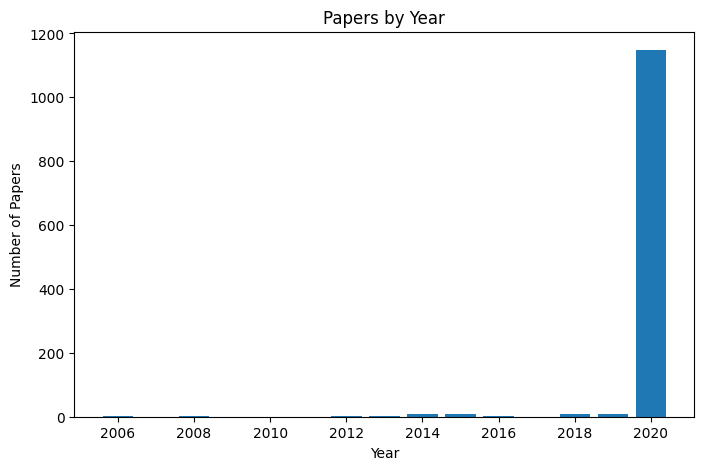

In [3]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
year_counts = df['publish_time'].dt.year.value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Papers by Year")
plt.show()


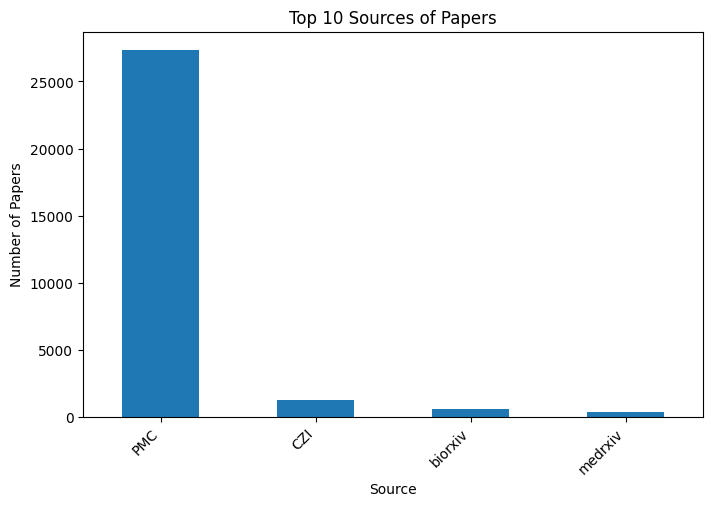

In [4]:
# Top 10 sources
top_sources = df['source_x'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_sources.plot(kind='bar')
plt.xlabel("Source")
plt.ylabel("Number of Papers")
plt.title("Top 10 Sources of Papers")
plt.xticks(rotation=45, ha="right")
plt.show()


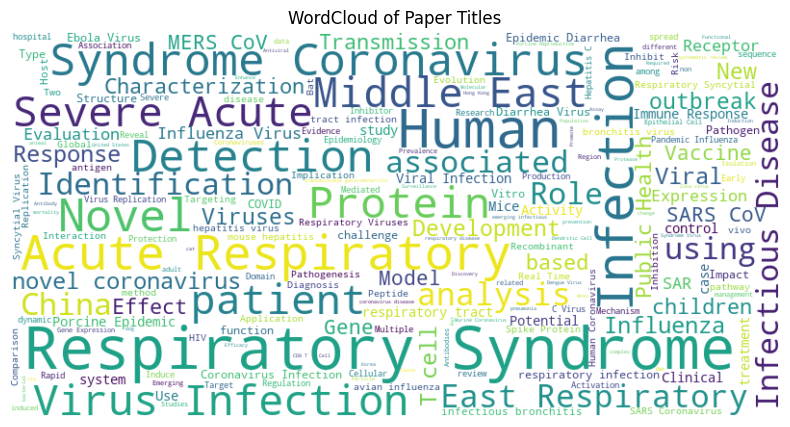

In [5]:
from wordcloud import WordCloud

# Combine all titles into one string
text = " ".join(str(title) for title in df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Paper Titles")
plt.show()


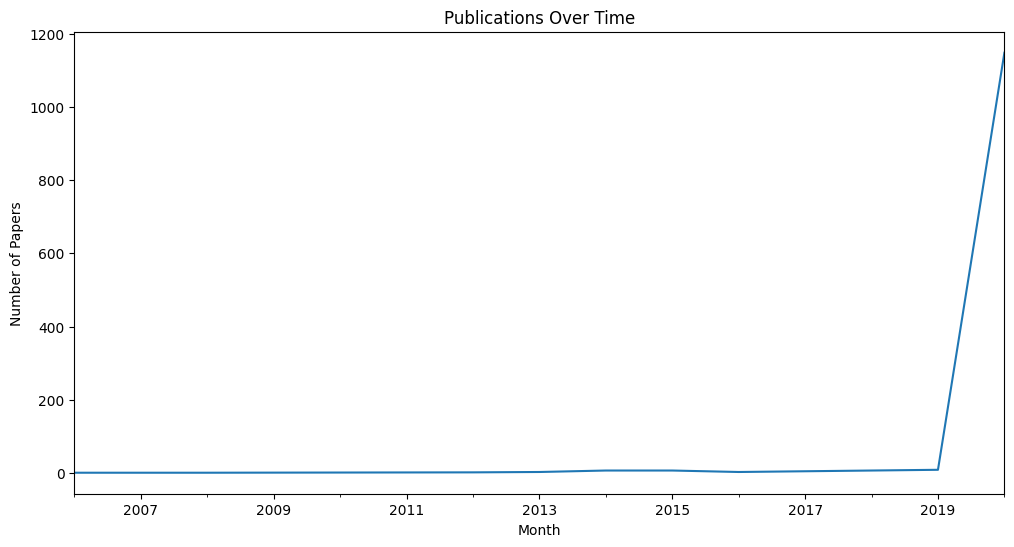

In [6]:
papers_per_month = df['publish_time'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12,6))
papers_per_month.plot()
plt.xlabel("Month")
plt.ylabel("Number of Papers")
plt.title("Publications Over Time")
plt.show()
